In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [2]:
#Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# descriptions
print(dataset.describe())
# class distribution
print(dataset.groupby('class').size())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [6]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

NameError: name 'model' is not defined

In [7]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [17]:
# evaluate each model in turn
results = []
names = []
scorings = ['recall_macro', 'accuracy', 'precision', 'neg_mean_absolute_error', 'neg_log_loss']

In [20]:
for name, model in models:
    for score in scorings:
        kfold = StratifiedKFold(n_splits=10, random_state=1)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='recall_macro')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f) %s' % (name, cv_results.mean(), cv_results.std(), score))

LR: 0.958333 (0.055902) recall_macro
LR: 0.958333 (0.055902) accuracy
LR: 0.958333 (0.055902) precision
LR: 0.958333 (0.055902) neg_mean_absolute_error
LR: 0.958333 (0.055902) neg_log_loss
LDA: 0.975000 (0.038188) recall_macro
LDA: 0.975000 (0.038188) accuracy
LDA: 0.975000 (0.038188) precision
LDA: 0.975000 (0.038188) neg_mean_absolute_error
LDA: 0.975000 (0.038188) neg_log_loss
KNN: 0.957222 (0.043959) recall_macro
KNN: 0.957222 (0.043959) accuracy
KNN: 0.957222 (0.043959) precision
KNN: 0.957222 (0.043959) neg_mean_absolute_error
KNN: 0.957222 (0.043959) neg_log_loss
CART: 0.951667 (0.054493) recall_macro
CART: 0.968333 (0.039051) accuracy
CART: 0.960000 (0.040277) precision
CART: 0.968333 (0.039051) neg_mean_absolute_error
CART: 0.951667 (0.054493) neg_log_loss
NB: 0.951667 (0.054493) recall_macro
NB: 0.951667 (0.054493) accuracy
NB: 0.951667 (0.054493) precision
NB: 0.951667 (0.054493) neg_mean_absolute_error
NB: 0.951667 (0.054493) neg_log_loss
SVM: 0.983333 (0.033333) recall_mac

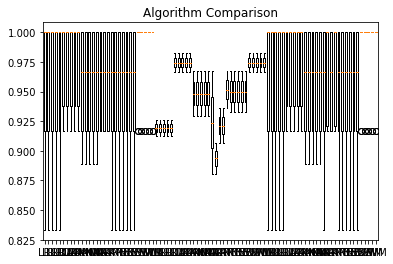

In [21]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()